In [1]:
from game_utils import MNKNode, random_play, minmax_decision, alpha_beta_search, maxplayer, minplayer, randplayer, game_play, mcts, mcts_player, dot_graph, firstmoveplayer
from operator import itemgetter

from IPython.display import Image

import pydot

import numpy as np

In [2]:
m = 3
n = 3
empty_board = []

for _ in range(m):
    empty_board.append(n*['-'])

ttt_empty_gn = MNKNode(empty_board, k = 3)


ttt_empty_gn


- - -
- - -
- - -

# Random Play

In [3]:
random_play(ttt_empty_gn)

- - -
- - -
- - -

It's X's turn.
Chosen move (0, 1, 'X')

- X -
- - -
- - -

It's O's turn.
Chosen move (1, 1, 'O')

- X -
- O -
- - -

It's X's turn.
Chosen move (2, 0, 'X')

- X -
- O -
X - -

It's O's turn.
Chosen move (1, 0, 'O')

- X -
O O -
X - -

It's X's turn.
Chosen move (1, 2, 'X')

- X -
O O X
X - -

It's O's turn.
Chosen move (0, 0, 'O')

O X -
O O X
X - -

It's X's turn.
Chosen move (0, 2, 'X')

O X X
O O X
X - -

It's O's turn.
Chosen move (2, 2, 'O')

O X X
O O X
X - O

Winner is O.


# Testing MINIMAX AND ALPHA-BETA

In [4]:
ttt_node = MNKNode(board=[['X', 'X', '-'], ['O', 'O', '-'], ['X', '-', '-']], k=3)
ttt_node

X X -
O O -
X - -

In [5]:
ttt_node.available_moves()

[(0, 2, 'O'), (1, 2, 'O'), (2, 1, 'O'), (2, 2, 'O')]

In [6]:
res = minmax_decision(ttt_node)
res

[((0, 2, 'O'), 0), ((1, 2, 'O'), -1), ((2, 1, 'O'), 1), ((2, 2, 'O'), 1)]

In [7]:
res = alpha_beta_search(ttt_node)
res

[((0, 2, 'O'), 0), ((1, 2, 'O'), -1), ((2, 1, 'O'), 1), ((2, 2, 'O'), 1)]

# GAME PLAY

In [10]:
# Game play

m = 4
n = 4
empty_board = []

for _ in range(m):
    empty_board.append(n*['-'])

empty_gn = MNKNode(empty_board, k = 3)

random_state = np.random.RandomState()

#x_player = lambda b: maxplayer(b, algo = alpha_beta_search)
#x_player = lambda b: randplayer(b, rs = random_state)
#x_player = lambda b: randplayer(b, rs = random_state)
x_player = lambda b: firstmoveplayer(b)
#x_player = lambda b: mcts_player(b, max_iter=100)
#x_player = lambda b: human_player(b, 'X')

#o_player = lambda b: minplayer(b, algo = alpha_beta_search)
#o_player = lambda b: randplayer(b, rs = random_state)
o_player = lambda b: mcts_player(b, max_iter=1000)


game_play(empty_gn, x_player, o_player)

- - - -
- - - -
- - - -
- - - -

It's X's turn.
Chosen move (0, 0, 'X').

X - - -
- - - -
- - - -
- - - -

It's O's turn.
Chosen move (2, 2, 'O').

X - - -
- - - -
- - O -
- - - -

It's X's turn.
Chosen move (0, 1, 'X').

X X - -
- - - -
- - O -
- - - -

It's O's turn.
Chosen move (0, 2, 'O').

X X O -
- - - -
- - O -
- - - -

It's X's turn.
Chosen move (0, 3, 'X').

X X O X
- - - -
- - O -
- - - -

It's O's turn.
Chosen move (1, 2, 'O').


Game ended.
X X O X
- - O -
- - O -
- - - -

Winner is O.


# MCTS

In [11]:
initial_gn = MNKNode(board=[['X', 'O', 'X'], ['-', '-', '-'], ['O', '-', '-']], k=3)
initial_gn

X O X
- - -
O - -

In [12]:
root_mcnode = mcts(initial_gn, np.random.RandomState(0), max_iter=100)
root_mcnode

X O X
- - -
O - -

U/N: 35.0/100

In [13]:
best_mcnode = max([(child, child.N) for child in root_mcnode.children], key=itemgetter(1))[0]
best_mcnode

X O X
- - -
O - X

U/N: 32.0/39

In [14]:
#root_mcnode.children

In [15]:
pydot_graph = dot_graph(root_mcnode)

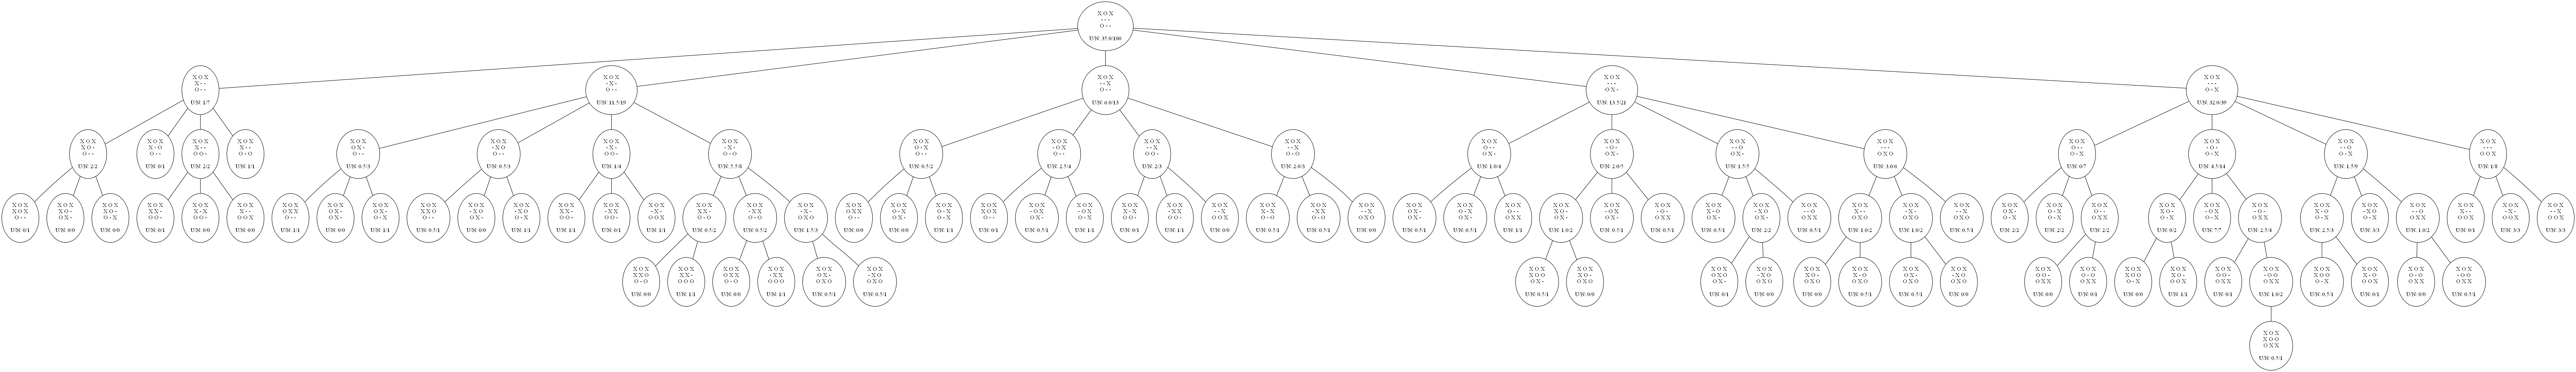

In [16]:
Image(pydot_graph.create_png())

In [17]:
pydot_graph.write_png('output.png')

In [18]:
def uct(U, N, pN, C = 1.4):
    if N == 0:
        return np.inf
    else:
        return (U/N) + C * np.sqrt(np.log(pN)/N)

In [19]:
usns = [(0, 1), [1, 2], [1, 1]]

pN = 5

C = 1.4

for u, n in usns:
    print("{}/{}: {:.3f}".format(u, n, uct(u, n, pN, C)))

0/1: 1.776
1/2: 1.756
1/1: 2.776
